In [17]:
%pylab inline
import numpy as np
import numpy.random as rand
import tensorflow as tf
import matplotlib.pyplot as plt
from numpy import random as rng
import seaborn as sns
import pickle
import argparse
import pandas as pd 

import pickle

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['rand', 'f', 'axes']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Make plots for variable $W$ correct batch

In [63]:
sns.set_style('ticks')
#Load data from script
fn_in = './experiments/nodepert4_exact/summary/2b_establish_convergence_feedforward_output_correctbatch.npz'
with open(fn_in, 'rb') as f:
    data = pickle.load(f)
tags = data['tags']
metrics = data['metrics']

fn_in = './experiments/feedbackalignment4_small/summary/2b_establish_convergence_feedforward_feedbackalignment_output.npz'
with open(fn_in, 'rb') as f:
    data = pickle.load(f)
#tags = data['tags']
fa_metrics = data['metrics']

#BP metrics
fn_in = './experiments/backprop4_small/summary/2b_establish_convergence_feedforward_backprop_output.npz'
with open(fn_in, 'rb') as f:
    data = pickle.load(f)
bp_metrics = data['metrics']

In [9]:
metrics.shape

(4, 5, 2001, 10)

In [66]:
#Final test losses
idx = 3
for i in range(N):
    print(np.mean(100-100*metrics[i,:,-1,idx]))
print(np.mean(100-100*fa_metrics[0,:,-1,idx]))
print(np.mean(100-100*bp_metrics[0,:,-1,idx]))

3.50874900818
3.51000070572
3.63874912262
15.920624733
4.28499937057
2.64937639236


In [12]:
def smooth(y, box_pts=50):
    box = np.ones(box_pts)/box_pts
    if len(y.shape) == 2:
        y_smooth = y.copy()
        for i in range(y.shape[0]):
            y_smooth[i,:] = np.convolve(y[i,:], box, mode='same')
    else:
        y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

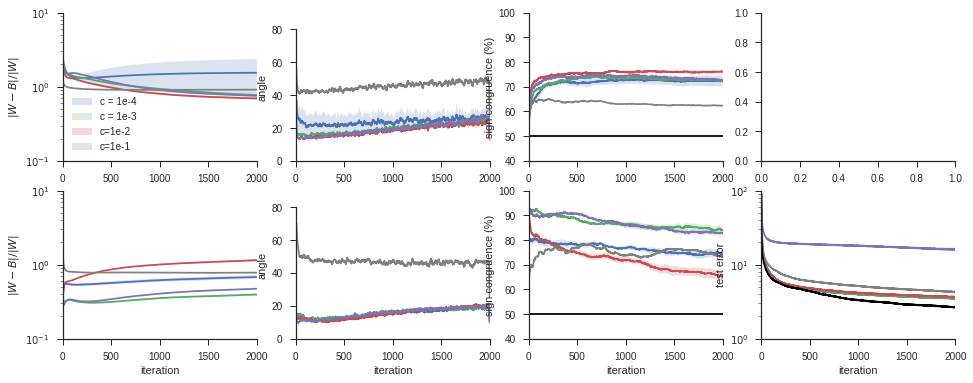

In [16]:
#Plot norms
var_xi = [1e-3, 1e-2, 1e-1, 1]
N = 4

bsize = 15

#Error
idx = 5
fig,axes = plt.subplots(2,4,figsize=(16,6))
for i in range(N):
    sns.tsplot(metrics[i,:,:,idx], ax = axes[0,0], color='C%d'%i)
axes[0,0].set_ylabel('$\|W-B\|/\|W\|$');
axes[0,0].set_yscale('log')
axes[0,0].set_ylim([0.1, 10])
sns.tsplot(fa_metrics[0,:,:,idx], ax = axes[0,0], color='grey')

idx = 8
for i in range(N):
    sns.tsplot(metrics[i,:,:,idx], ax = axes[1,0], color='C%d'%i)
axes[1,0].set_xlabel('iteration');
axes[1,0].set_ylabel('$\|W-B\|/\|W\|$');
axes[1,0].set_yscale('log')
axes[1,0].set_ylim([0.1, 10])
sns.tsplot(fa_metrics[0,:,:,idx], ax = axes[1,0], color='grey')

#Alignment
idx = 4
for i in range(N):
    sns.tsplot(smooth(metrics[i,:,:,idx], bsize), ax = axes[0,1], color='C%d'%i)
axes[0,1].set_ylabel('angle');
axes[0,1].set_ylim([0, 90])
sns.tsplot(smooth(fa_metrics[0,:,:,idx], bsize), ax = axes[0,1], color='grey')

idx = 7
for i in range(N):
    sns.tsplot(smooth(metrics[i,:,:,idx], bsize), ax = axes[1,1], color='C%d'%i)
axes[1,1].set_xlabel('iteration');
axes[1,1].set_ylabel('angle');
axes[1,1].set_ylim([0, 90])

sns.tsplot(smooth(fa_metrics[0,:,:,idx],bsize), ax = axes[1,1], color='grey')

#Congruence
idx = 6
for i in range(N):
    sns.tsplot(100*metrics[i,:,:,idx], ax = axes[0,2], color='C%d'%i)
axes[0,2].set_ylabel('sign congruence (%)');
axes[0,2].axhline(y = 50, color = 'black')
axes[0,2].set_ylim([40, 100])
sns.tsplot(100*fa_metrics[0,:,:,idx], ax = axes[0,2], color='grey')

idx = 9
for i in range(N):
    sns.tsplot(100*metrics[i,:,:,idx], ax = axes[1,2], color='C%d'%i)
axes[1,2].set_xlabel('iteration');
axes[1,2].set_ylabel('sign congruence (%)');
axes[1,2].axhline(y = 50, color = 'black')
axes[1,2].set_ylim([40, 100])
sns.tsplot(100*fa_metrics[0,:,:,idx], ax = axes[1,2], color='grey')

idx = 3
for i in range(N):
    sns.tsplot(100-100*metrics[i,:,:,idx], ax = axes[1,3], color='C%d'%i)
axes[1,3].set_ylabel('test error');
axes[1,3].set_xlabel('iteration');
axes[1,3].set_yscale('log')
axes[1,3].set_ylim([1, 100])
axes[1,3].set_xlim([0, 1000])

sns.tsplot(100-100*fa_metrics[0,:,:,idx], ax = axes[1,3], color='grey')
sns.tsplot(100-100*bp_metrics[0,:,:,idx], ax = axes[1,3], color='black')

sns.despine(trim=True)
axes[0,0].legend(['c = 1e-4', 'c = 1e-3', 'c=1e-2', 'c=1e-1'])

plt.savefig('./figures/fig_2b_validate_nodepert_varw_correctbatches.pdf')

## Fixed w correct batch exact

In [33]:
sns.set_style('ticks')
#Load data from script
fn_in = './experiments/nodepert4_fixedw_exact/summary/2_establish_convergence_feedforward_output_correctbatches.npz'
with open(fn_in, 'rb') as f:
    data = pickle.load(f)
tags = data['tags']
metrics = data['metrics']

In [34]:
print(metrics.shape)
tags

(3, 3, 1001, 10)


['loss',
 'acc',
 'loss_test',
 'acc_test',
 'align_B2',
 'norm_W2_B2',
 'sign_cong2',
 'align_B3',
 'norm_W3_B3',
 'sign_cong3']

In [55]:
tags = ['acc',
 'loss',
 'loss_test',
 'align_B2',
 'align_B3',
 'acc_test',
 'norm_W3_B3',
 'norm_W2_B2']

fn_in = './experiments/prashanth_nodepert4_fixedw_exact/summary/neuron_metrics.npy'
neuron_metrics = np.load(fn_in)
neuron_metrics.shape

(4, 3, 2001, 8)

## Make plots

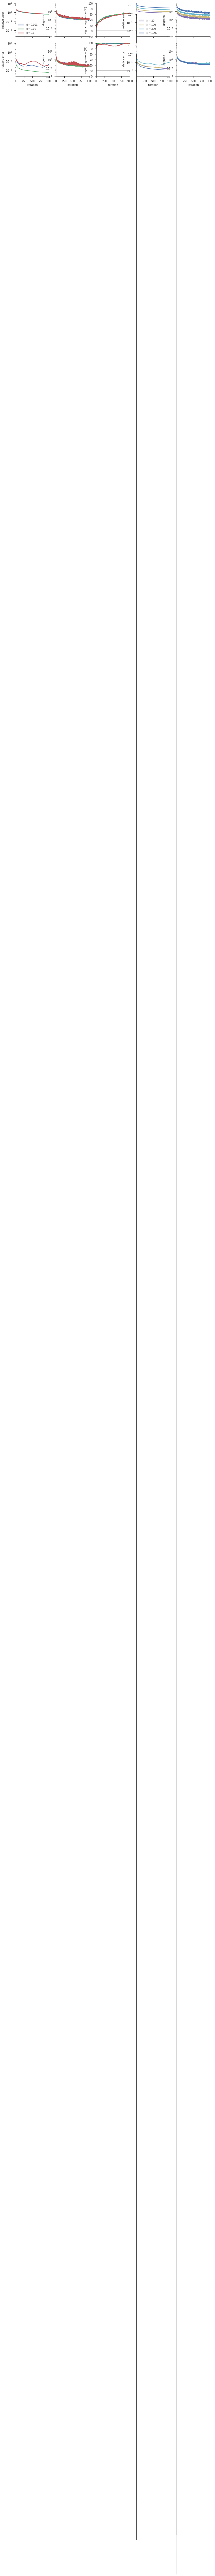

In [62]:
#Plot norms
var_xi = [1e-3, 1e-2, 1e-1]
N = metrics.shape[0]

#Error
idx = 5
fig,axes = plt.subplots(2,5,figsize=(13,5), sharex = True)
for i in range(N):
    sns.tsplot(metrics[i,:,:,idx], ax = axes[0,0], color='C%d'%i)
axes[0,0].set_ylabel('relative error');
axes[0,0].set_yscale('log')
axes[0,0].set_ylim([0.002, 10])
axes[0,0].legend(['xi = 0.001', 'xi = 0.01', 'xi = 0.1'])

idx = 8
for i in range(N):
    sns.tsplot(metrics[i,:,:,idx], ax = axes[1,0], color='C%d'%i)
axes[1,0].set_ylabel('relative error');
axes[1,0].set_yscale('log')
axes[1,0].set_ylim([0.002, 10])
axes[1,0].set_xlabel('iteration');

#alignment
idx = 4
for i in range(N):
    sns.tsplot(metrics[i,:,:,idx], ax = axes[0,1], color='C%d'%i)
axes[0,1].set_ylabel('degrees');
axes[0,1].set_yscale('log')
axes[0,1].set_ylim([0.01, 90])

idx = 7
for i in range(N):
    sns.tsplot(metrics[i,:,:,idx], ax = axes[1,1], color='C%d'%i)
axes[1,1].set_yscale('log')
axes[1,1].set_ylim([0.01, 90])
axes[1,1].set_ylabel('degrees');
axes[1,1].set_xlabel('iteration');

#sign congruence
idx = 6
for i in range(N):
    sns.tsplot(100*metrics[i,:,:,idx], ax = axes[0,2], color='C%d'%i)
axes[0,2].set_ylabel('sign congruence (%)');
axes[0,2].axhline(y = 50, color = 'black')
axes[0,2].set_ylim([40, 100])

idx = 9
for i in range(N):
    sns.tsplot(100*metrics[i,:,:,idx], ax = axes[1,2], color='C%d'%i)
axes[1,2].set_ylabel('sign congruence (%)');
axes[1,2].set_xlabel('iteration');
axes[1,2].axhline(y = 50, color = 'black')
axes[1,2].set_ylim([40, 100])
sns.despine(trim=True)


#Plot different neuron number results too
N = neuron_metrics.shape[0]

#Norm layer 1
idx = 7
for i in range(N):
    sns.tsplot(neuron_metrics[i,:,0:1000,idx], ax = axes[0,3], color='C%d'%(i+3))
axes[0,3].set_ylabel('relative error');
axes[0,3].set_yscale('log')
axes[0,3].set_ylim([0.002, 20])
axes[0,3].legend(['N = 30', 'N = 100', 'N = 300', 'N = 1000'])

#Norm layer 2
idx = 6
for i in range(N):
    sns.tsplot(neuron_metrics[i,:,0:1000,idx], ax = axes[1,3], color='C%d'%(i+3))
axes[1,3].set_ylabel('relative error');
axes[1,3].set_yscale('log')
axes[1,3].set_ylim([0.002, 20])
axes[1,3].set_xlabel('iteration');

#Align layer 1
idx = 3
for i in range(N):
    sns.tsplot(neuron_metrics[i,:,0:1000,idx], ax = axes[0,4], color='C%d'%(i+3))
axes[0,4].set_ylabel('degrees');
axes[0,4].set_yscale('log')
axes[0,4].set_ylim([0.01, 90])

#Align layer 2
idx = 4
for i in range(N):
    sns.tsplot(neuron_metrics[i,:,0:1000,idx], ax = axes[1,4], color='C%d'%(i+3))
axes[1,4].set_ylabel('degrees');
axes[1,4].set_yscale('log')
axes[1,4].set_ylim([0.01, 90])
axes[1,4].set_xlabel('iteration');

plt.savefig('./figures/fig_2_validate_nodepert.pdf')